In [8]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from model import Net
from utils import train, test,  train_acc, test_acc, train_losses, test_losses, train_test_plots

<IPython.core.display.Javascript object>

In [10]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = 'cuda' if cuda else 'cpu'

CUDA Available? True


<IPython.core.display.Javascript object>

In [11]:
# CODE 3

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1407,), (0.4081,))
    transforms.Normalize((0.1307,), (0.3081,)),
    
    ])

<IPython.core.display.Javascript object>

In [12]:
# CODE 4

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



<IPython.core.display.Javascript object>

In [13]:
# CODE 5

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

<IPython.core.display.Javascript object>

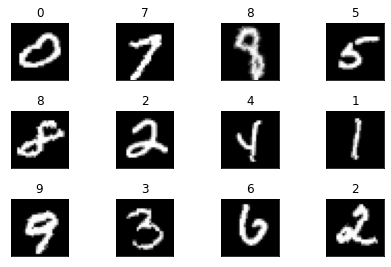

<IPython.core.display.Javascript object>

In [14]:
# CODE 6

import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])



In [15]:
# CODE 10 

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  scheduler.step()
  test(model, device, test_loader, criterion)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.8616 Batch_id=117 Accuracy=26.55: 100%|██████████| 118/118 [00:16<00:00,  7.10it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0036, Accuracy: 3431/10000 (34.31%)

Epoch 2


Train: Loss=0.2692 Batch_id=117 Accuracy=80.72: 100%|██████████| 118/118 [00:17<00:00,  6.67it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0003, Accuracy: 9604/10000 (96.04%)

Epoch 3


Train: Loss=0.0743 Batch_id=117 Accuracy=95.07: 100%|██████████| 118/118 [00:17<00:00,  6.69it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0002, Accuracy: 9728/10000 (97.28%)

Epoch 4


Train: Loss=0.1209 Batch_id=117 Accuracy=96.50: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9771/10000 (97.71%)

Epoch 5


Train: Loss=0.0999 Batch_id=117 Accuracy=97.03: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9804/10000 (98.04%)

Epoch 6


Train: Loss=0.1532 Batch_id=117 Accuracy=97.47: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9854/10000 (98.54%)

Epoch 7


Train: Loss=0.0611 Batch_id=117 Accuracy=97.82: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9866/10000 (98.66%)

Epoch 8


Train: Loss=0.0722 Batch_id=117 Accuracy=98.05: 100%|██████████| 118/118 [00:23<00:00,  5.03it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9875/10000 (98.75%)

Epoch 9


Train: Loss=0.0601 Batch_id=117 Accuracy=98.09: 100%|██████████| 118/118 [00:26<00:00,  4.37it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9879/10000 (98.79%)

Epoch 10


Train: Loss=0.0126 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:24<00:00,  4.72it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9902/10000 (99.02%)

Epoch 11


Train: Loss=0.0160 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9864/10000 (98.64%)

Epoch 12


Train: Loss=0.0122 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9904/10000 (99.04%)

Epoch 13


Train: Loss=0.0275 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0001, Accuracy: 9903/10000 (99.03%)

Epoch 14


Train: Loss=0.0670 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0000, Accuracy: 9907/10000 (99.07%)

Epoch 15


Train: Loss=0.0807 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0000, Accuracy: 9915/10000 (99.15%)

Epoch 16


Train: Loss=0.0153 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0000, Accuracy: 9926/10000 (99.26%)

Epoch 17


Train: Loss=0.0749 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0000, Accuracy: 9930/10000 (99.30%)

Epoch 18


Train: Loss=0.0144 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0000, Accuracy: 9924/10000 (99.24%)

Epoch 19


Train: Loss=0.0178 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:28<00:00,  4.08it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0000, Accuracy: 9924/10000 (99.24%)

Epoch 20


Train: Loss=0.0462 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:24<00:00,  4.74it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0000, Accuracy: 9928/10000 (99.28%)



<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Test Accuracy')

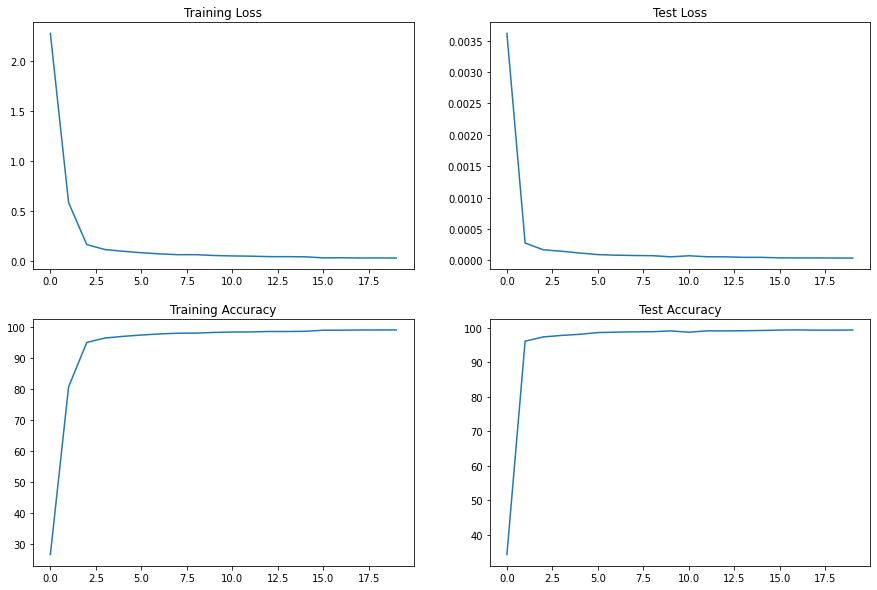

<IPython.core.display.Javascript object>

In [18]:
# CODE 11
train_test_plots(train_acc, test_acc, train_losses, test_losses)

In [19]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


<IPython.core.display.Javascript object>